<h1>Employee_Attrition_Classification</h1>

<p>The Synthetic Employee Attrition Dataset is a simulated dataset designed for the analysis and prediction of employee attrition. It contains detailed information about various aspects of an employee's profile, including demographics, job-related features, and personal circumstances.

The dataset comprises 74,498 samples, split into training and testing sets to facilitate model development and evaluation. Each record includes a unique Employee ID and features that influence employee attrition. The goal is to understand the factors contributing to attrition and develop predictive models to identify at-risk employees.

This dataset is ideal for HR analytics, machine learning model development, and demonstrating advanced data analysis techniques. It provides a comprehensive and realistic view of the factors affecting employee retention, making it a valuable resource for researchers and practitioners in the field of human resources and organizational development.

Data Source: Kaggle datasets

Code: "https://github.com/Pipikopimame/orbe_public"

</p>

<h2>1. Training Datasets</h2>

In [10]:
import employee_attrition_classification
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel,RFE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier,MLPRegressor
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,HistGradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

const = employee_attrition_classification.base()
data = const.train_data()
data2 = const.test_data()
train_data = data.drop(columns=['attrition'])
train_label = data['attrition']
test_data = data2.drop(columns=['attrition'])
test_label = data2['attrition']
train_data

,age,gender,years_at_company,job_role,monthly_income,work_life_balance,job_satisfaction,performance_rating,number_of_promotions,overtime,...,marital_status,number_of_dependents,job_level,company_size,company_tenure,remote_work,leadership_opportunities,innovation_opportunities,company_reputation,employee_recognition
0,31,1,19,0,5390,0,2,0,2,0,...,1,0,1,1,89,0,0,0,0,2
1,59,0,4,3,5534,3,0,3,3,0,...,0,3,1,1,21,0,0,0,1,1
2,24,0,10,2,8159,2,0,3,0,0,...,1,3,1,1,74,0,0,0,3,1
3,36,0,7,0,3989,2,0,2,1,0,...,2,2,1,2,50,1,0,0,2,2
4,56,1,41,0,4821,1,3,0,0,1,...,0,0,2,1,68,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59593,50,0,12,0,4414,1,0,0,1,1,...,2,2,2,2,35,0,0,1,3,3
59594,18,1,4,2,8040,1,0,2,3,0,...,2,0,2,1,73,0,0,0,1,2
59595,22,0,14,4,7944,1,0,2,0,1,...,1,2,0,2,29,0,1,0,2,2
59596,23,1,8,0,2931,1,3,0,0,0,...,2,0,0,0,9,0,0,0,2,1


<h2>2. Model Training</h2>

<h3>1) GradientBoostingClassifier</h3>

In [11]:
gbrt_model = GradientBoostingClassifier(learning_rate=0.1,n_estimators=500,max_depth=4,random_state=0)
gbrt_model.fit(train_data,train_label)
print("Test score: {:2f}".format(gbrt_model.score(test_data,test_label)))

Test score: 0.759329


<h3>1)-2 GradientBoostingClassifier Accuracy</h3>

In [14]:
pred = gbrt_model.predict(test_data)
print("Accuracy score: {:2f}".format(accuracy_score(test_label,pred)))

Accuracy score: 0.759329


<h3>1)-3 GradientBoostingClassifier Feature_Importance</h3>

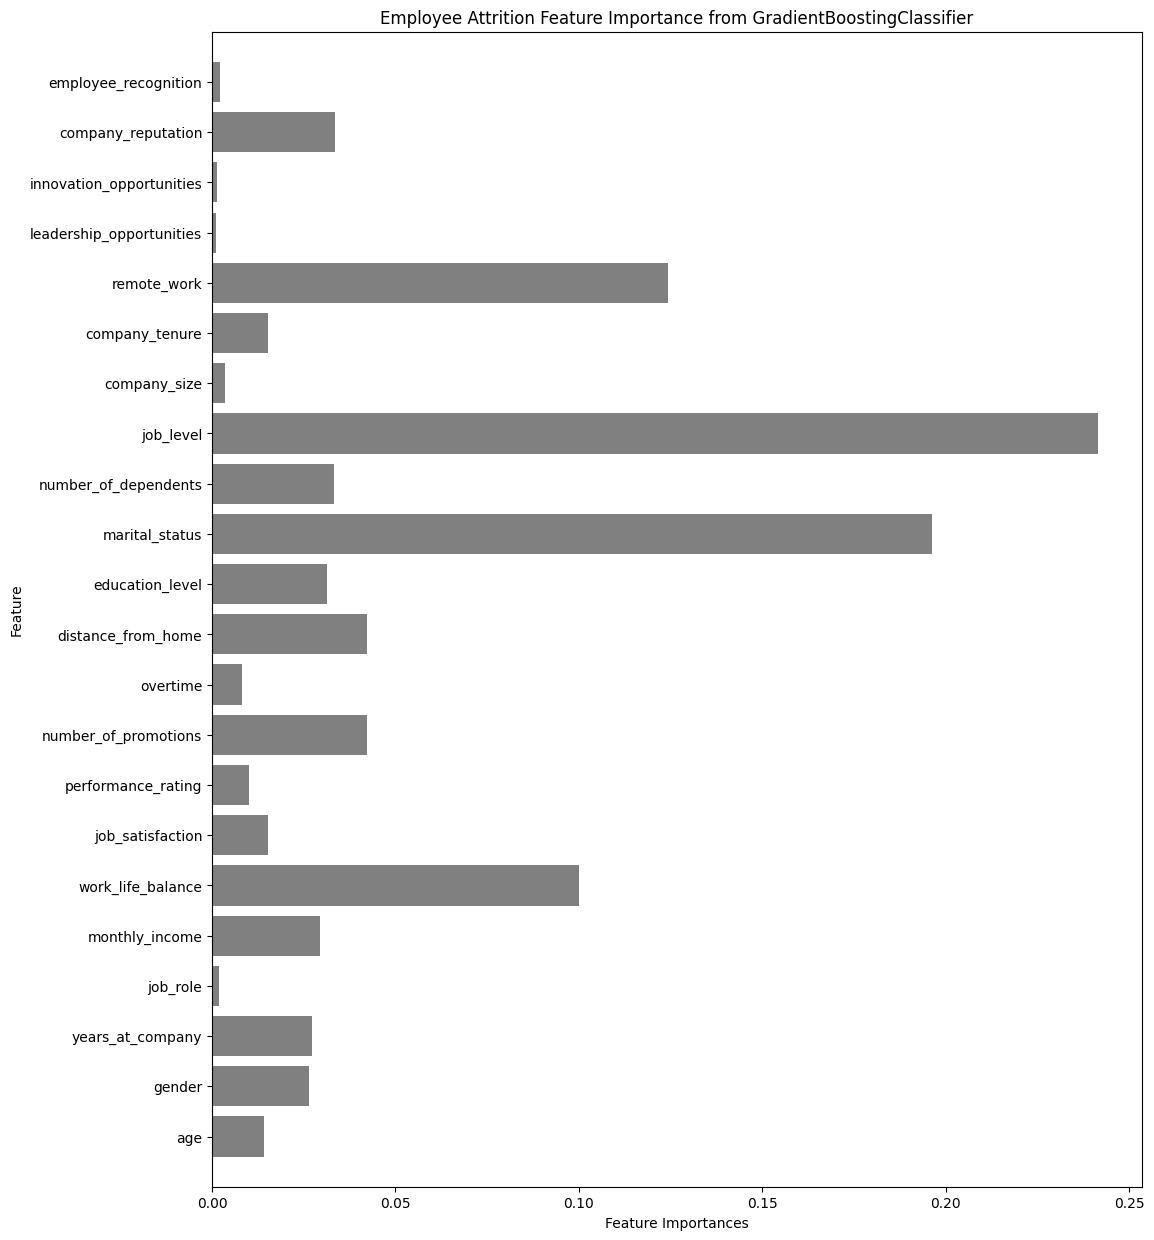

In [15]:
gbrt_model.feature_importances_
fig,ax = plt.subplots(1,1,figsize=(12,15))
ax.barh(np.arange(len(train_data.columns)),gbrt_model.feature_importances_,align='center',color='grey')
ax.set_yticks(np.arange(len(train_data.columns)),train_data.columns)
ax.set_xlabel('Feature Importances')
ax.set_ylabel('Feature')
ax.set_ylim(-1,len(train_data.columns))
ax.set_title('Employee Attrition Feature Importance from GradientBoostingClassifier')
plt.show()

<h3>2) RandomForestClassifier </h3>

In [16]:
forest_model = RandomForestClassifier(n_estimators=200)
forest_model.fit(train_data,train_label)
print("Test score: {:2f}".format(forest_model.score(test_data,test_label)))

Test score: 0.746846


<h3>2)-1 RandomForestClassifier Accuracy</h3>

In [17]:
pred = forest_model.predict(test_data)
print("Accuracy score: {:2f}".format(accuracy_score(test_label,pred)))

Accuracy score: 0.746846


<h3>2)-2 RandomForestClassifier Feature_Importance</h3>

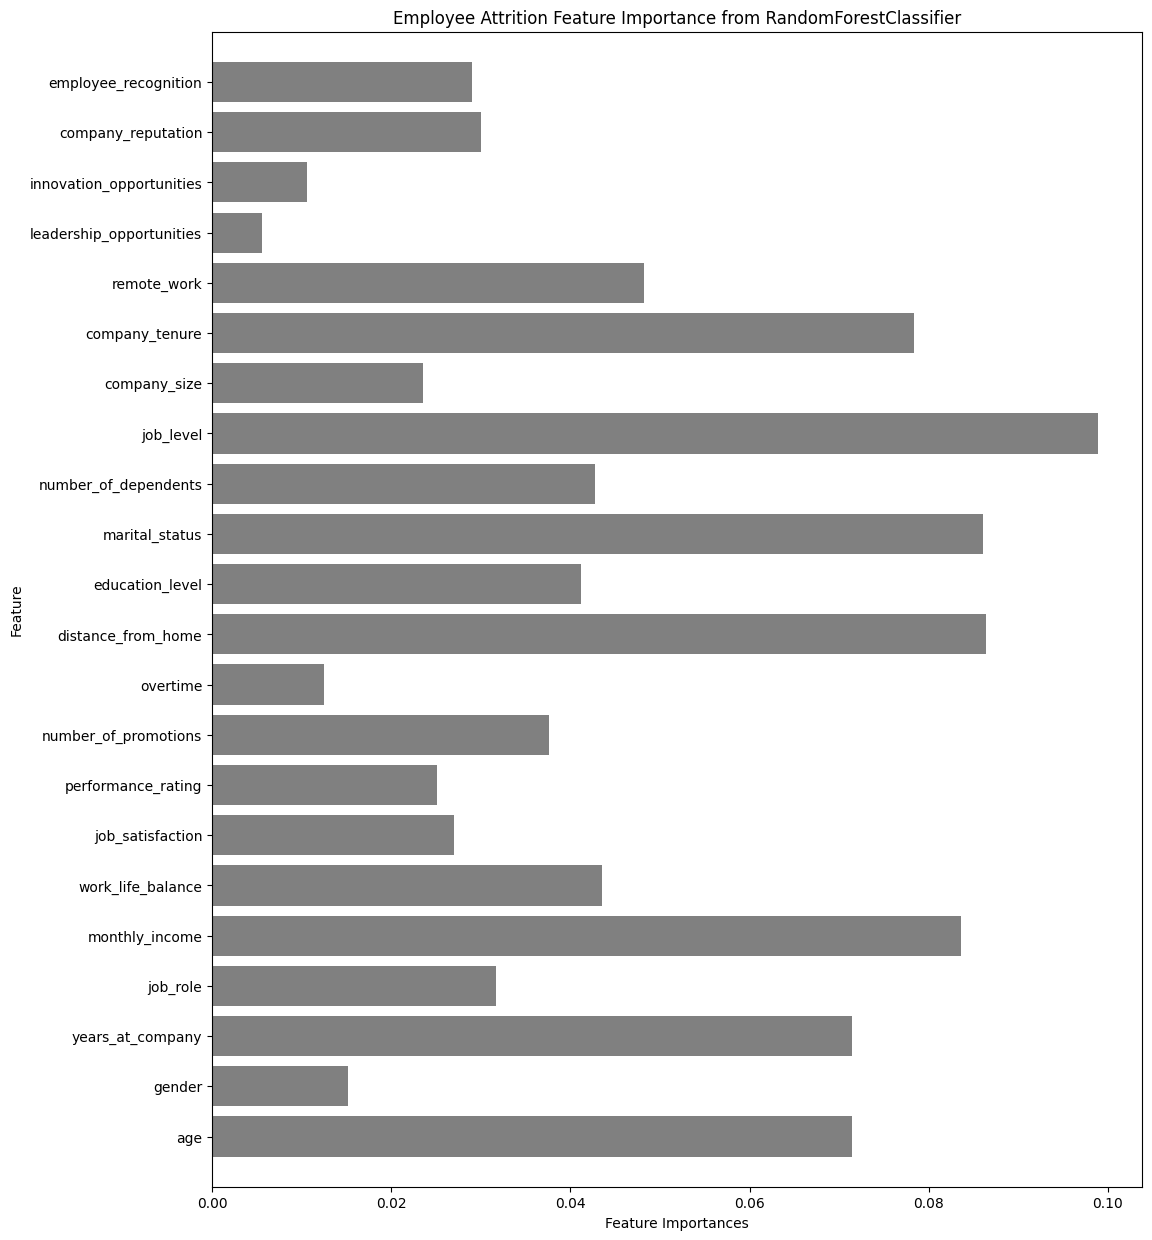

In [18]:
forest_model.feature_importances_
fig,ax = plt.subplots(1,1,figsize=(12,15))
ax.barh(np.arange(len(train_data.columns)),forest_model.feature_importances_,align='center',color='grey')
ax.set_yticks(np.arange(len(train_data.columns)),train_data.columns)
ax.set_xlabel('Feature Importances')
ax.set_ylabel('Feature')
ax.set_ylim(-1,len(train_data.columns))
ax.set_title('Employee Attrition Feature Importance from RandomForestClassifier')
plt.show()